In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [7]:
def getData(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    
    scalar.append('eta_quark')
    scalar.append('p_quark')
    scalar.append('theta_quark')
    
    scalar.append('eta_electron')
    scalar.append('p_electron')
    scalar.append('pt_electron')
    scalar.append('theta_electron')  
    scalar.append('phi_photon')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print 'Processed', inputFilename, 'in',  end-start, 'seconds'
    return pd.concat([x for x in dataframes])

In [8]:
files = ["$HOME/EIC/output/102.root"]
a = getData(files)

Processed $HOME/EIC/output/102.root in 116.465914965 seconds


In [4]:
xedges = [0.008, 0.01, 0.02, 0.03, 0.05, 0.1, 0.5]
Q2edges = [1, 10, 25, 55, 100, 200, 400, 5000]

radii_small = [0, 5, 10, 15, 20, 25]
r_labels_small = ['0','5','10','15','20','25']
radii_large = [0, 10, 20, 30, 40, 50, 60]
r_labels_large = ['0','10','20','30','40','50','60']
angles = [90, 139.604937421, 164.585373193, 174.299529125, 177.90141703, 180, 182.09858297, 185.700470875, 195.414626807,
          220.395062579, 270, 319.604937421, 344.585373193, 354.299529125, 357.90141703, 360]
eta_labels = ['0','-1','-2','-3','-4','$-\infty$','-4','-3','-2','-1','0','1','2','3','4', '$\infty$']
nr_small = 25
nr_large = 60
ntheta = 90

In [10]:
d = keepOneJet(a)
d = applyCut(d, '5 < pt_electron < 30', '5 < pt_electron < 30')
d = applyCut(d, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
d = applyCut(d, 'W2 > 4', 'W2 > 4')
d.eval('theta_quark_neg = 6.28318530718 - theta_quark', inplace = True)
#d.eval('Q = sqrt(Q2)', inplace=True)
#d.eval('ratio = pt_jet / Q', inplace=True)
#d = fixPhi(d, 'photon')
#d = applyCut(d, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')


Remove extra jets 9009649  fraction kept: 24.8
5 < pt_electron < 30 205212  fraction kept: 2.3
0.1 < y < 0.85 97123  fraction kept: 47.3
W2 > 4 97123  fraction kept: 100.0


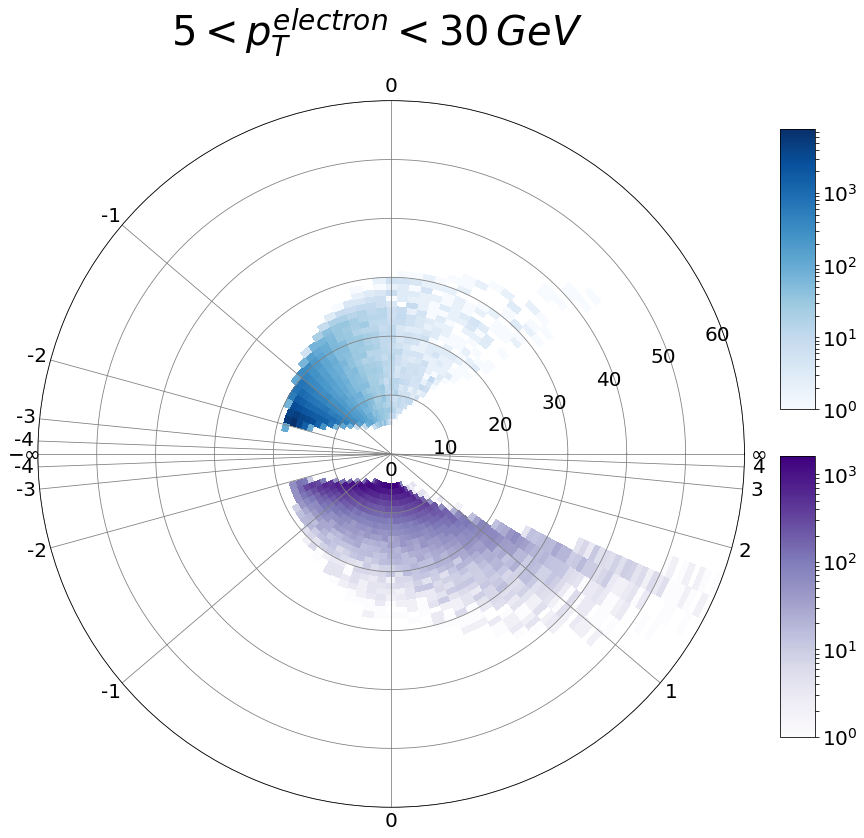

In [12]:
fig = plt.figure(figsize=(16,13))
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.subplot(111, polar=True)
radii = radii_large
r_labels = r_labels_large
nr = nr_large
r_edges = np.linspace(0, nr, nr + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(d['p_electron'], d['theta_electron'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(d['p_quark'], d['theta_quark_neg'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Purples', norm=LogNorm())
plt.rgrids(radii, labels=r_labels, fontsize=20)
plt.thetagrids(angles, labels=eta_labels, fontsize=20)
plt.grid(color='grey')
cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.85, 0.55, 0.03, 0.3]))
cbar_e.ax.tick_params(labelsize=20)
cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.85, 0.2, 0.03, 0.3]))
cbar_q.ax.tick_params(labelsize=20)
plt.suptitle('$5 < p_T^{electron} < 30 \, GeV$', fontsize=40)
   
plt.savefig('images/polar_quark_1012.pdf', bbox_inches='tight')

In [9]:
def plot(Q2Index, xIndex, Q2Str, xStr, txt):
    
    fig = plt.figure(figsize=(16,13))
    plt.subplots_adjust(wspace=0, hspace=0)
    
    plt.subplot(111, polar=True)
    df = ds_quark[Q2Index][xIndex]
    polar(Q2Index, xIndex, df['p_quark'], df['theta_quark_neg'], 'quark', df['p_electron'], df['theta_electron'],'Purples')
    plt.suptitle(xStr + ',$' + Q2Str + 'GeV^2$', fontsize=40)

    plt.savefig('images/'+txt+'.png', bbox_inches='tight')

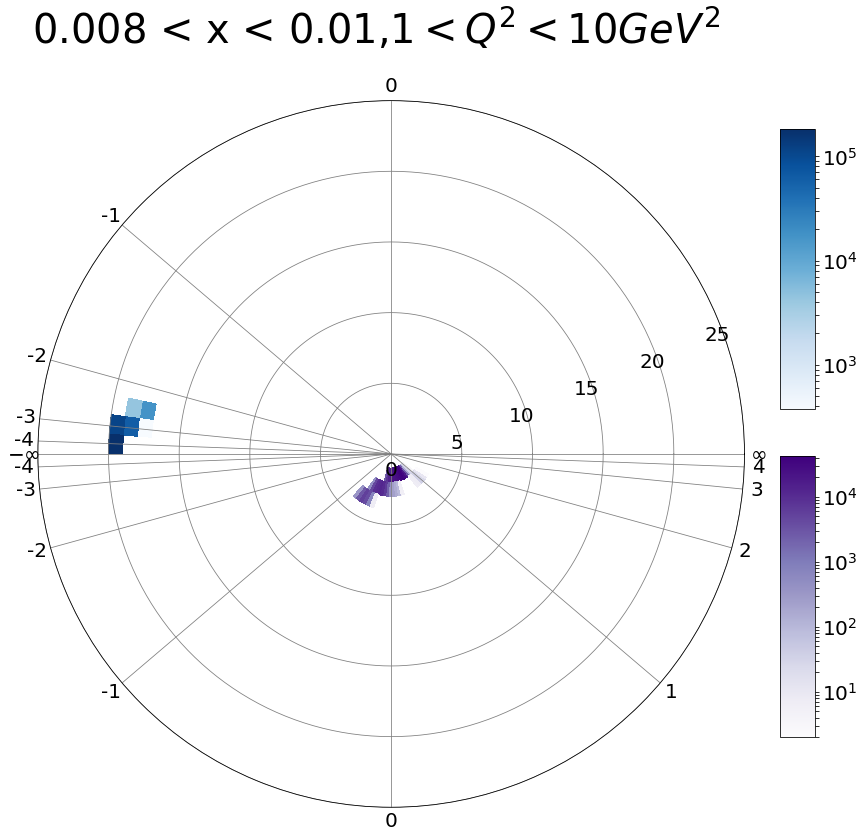

In [11]:
plot(0, 0, '1 < Q^2 < 10', '0.008 < x < 0.01', '1-10-008-01-q')

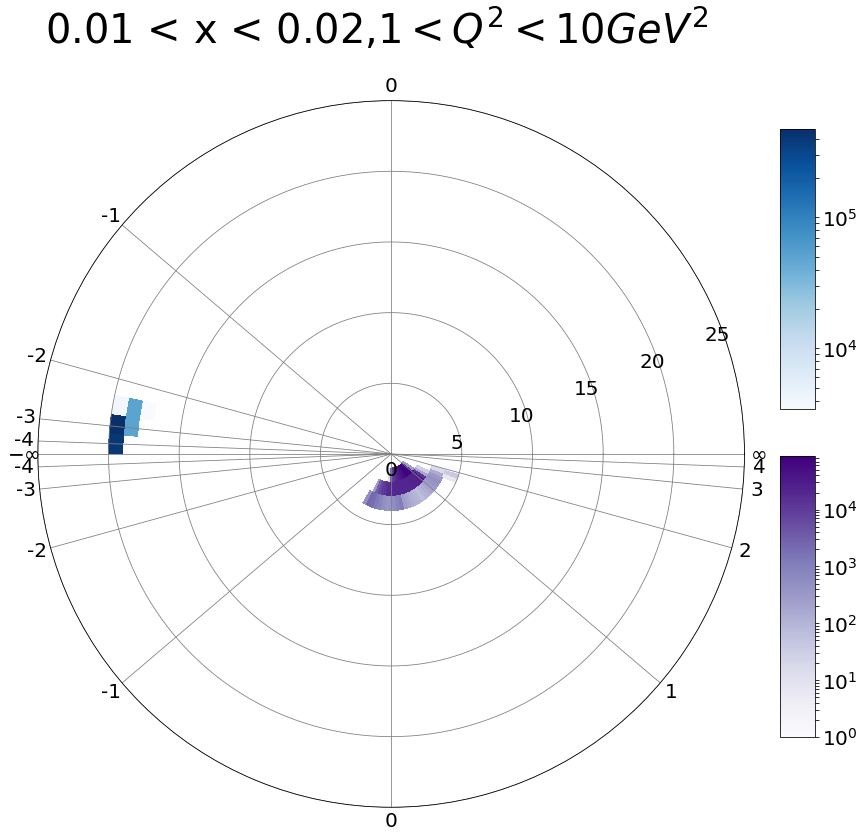

In [12]:
plot(0, 1, '1 < Q^2 < 10', '0.01 < x < 0.02', '1-10-01-02-q')

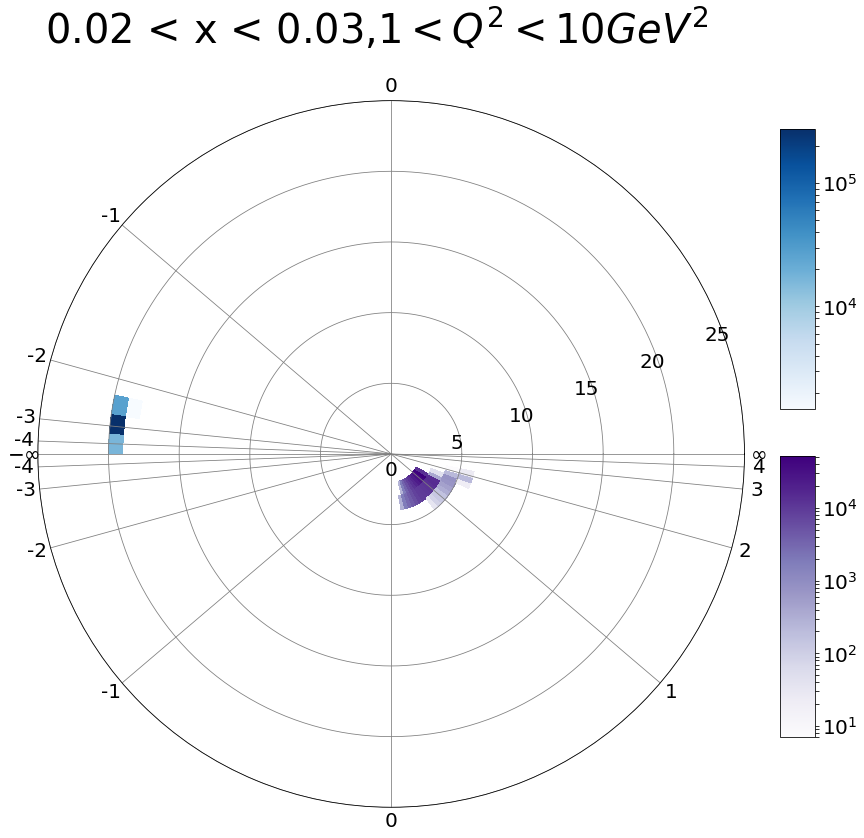

In [13]:
plot(0, 2, '1 < Q^2 < 10', '0.02 < x < 0.03', '1-10-02-03-q')

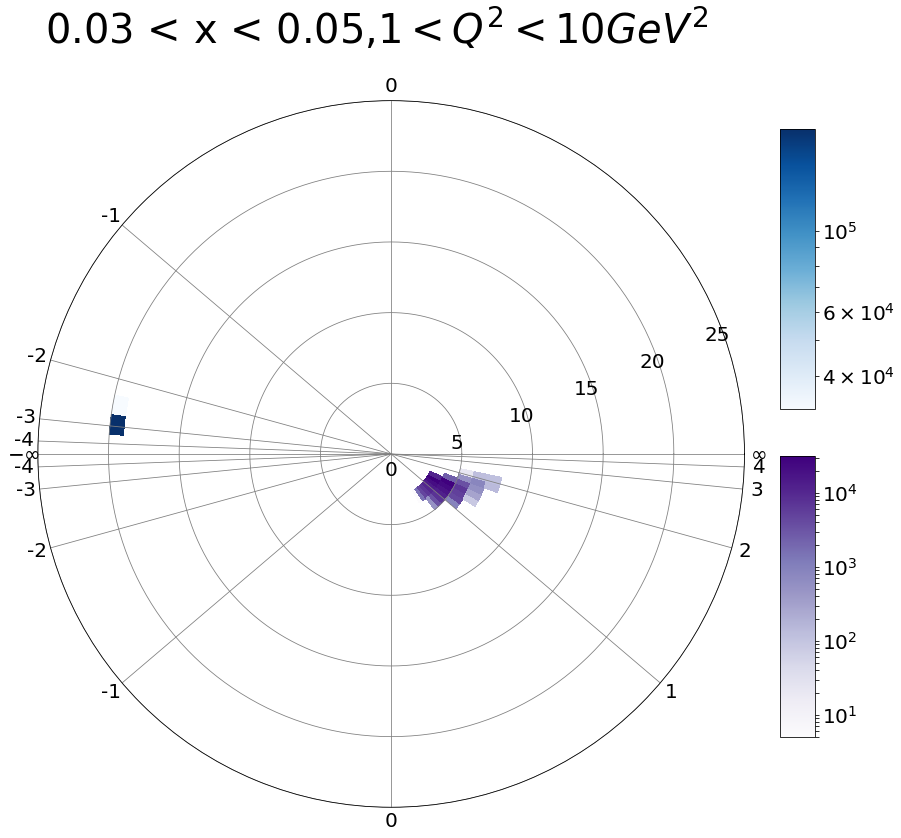

In [14]:
plot(0, 3, '1 < Q^2 < 10', '0.03 < x < 0.05', '1-10-03-05-q')

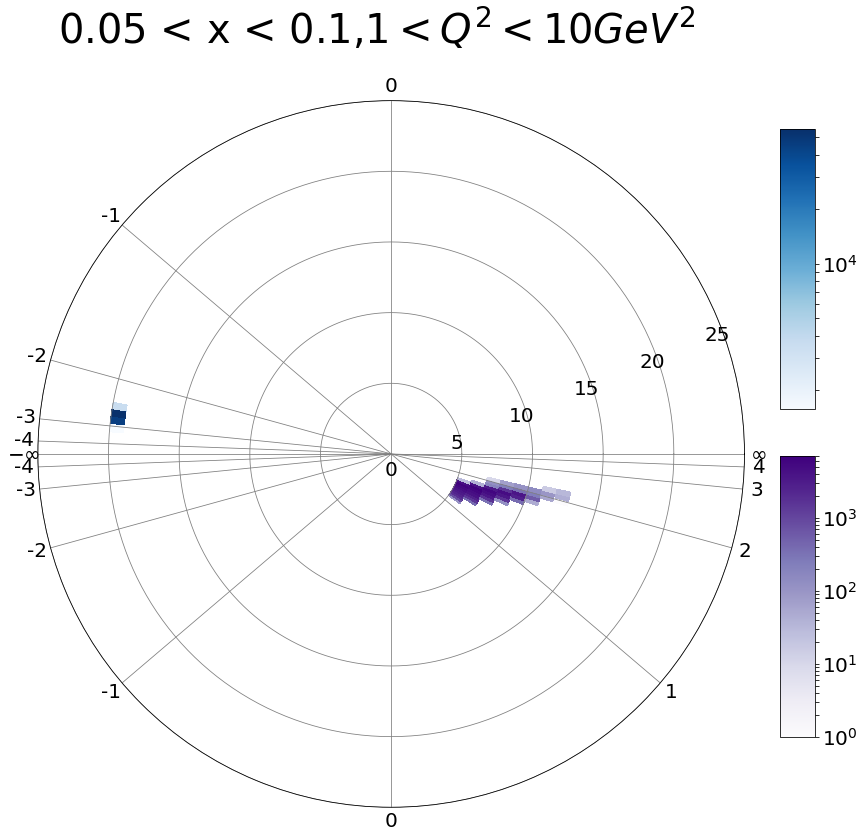

In [11]:
plot(0, 4, '1 < Q^2 < 10', '0.05 < x < 0.1', '1-10-05-1-q')

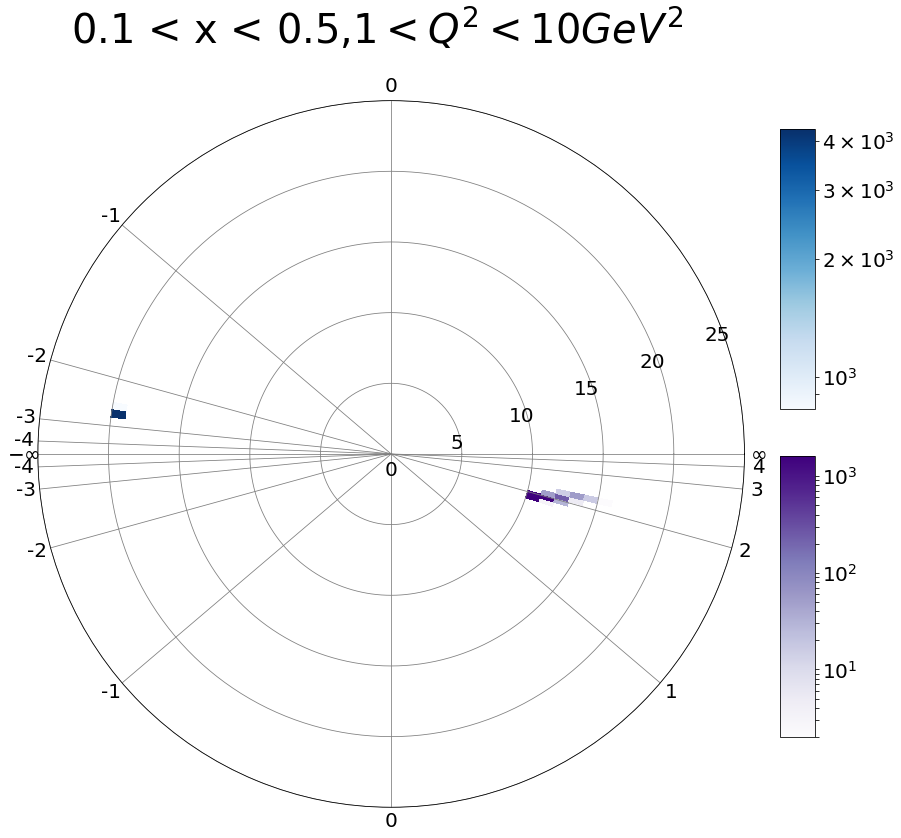

In [12]:
plot(0, 5, '1 < Q^2 < 10', '0.1 < x < 0.5', '1-10-1-5-q')

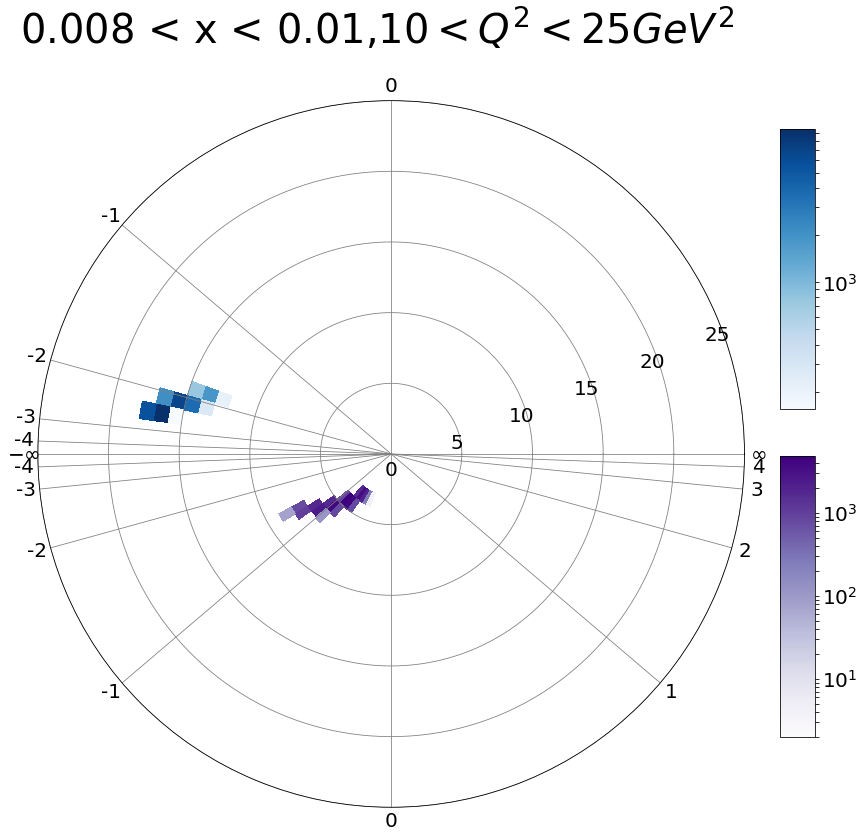

In [15]:
plot(1, 0, '10 < Q^2 < 25', '0.008 < x < 0.01', '10-25-008-01-q')

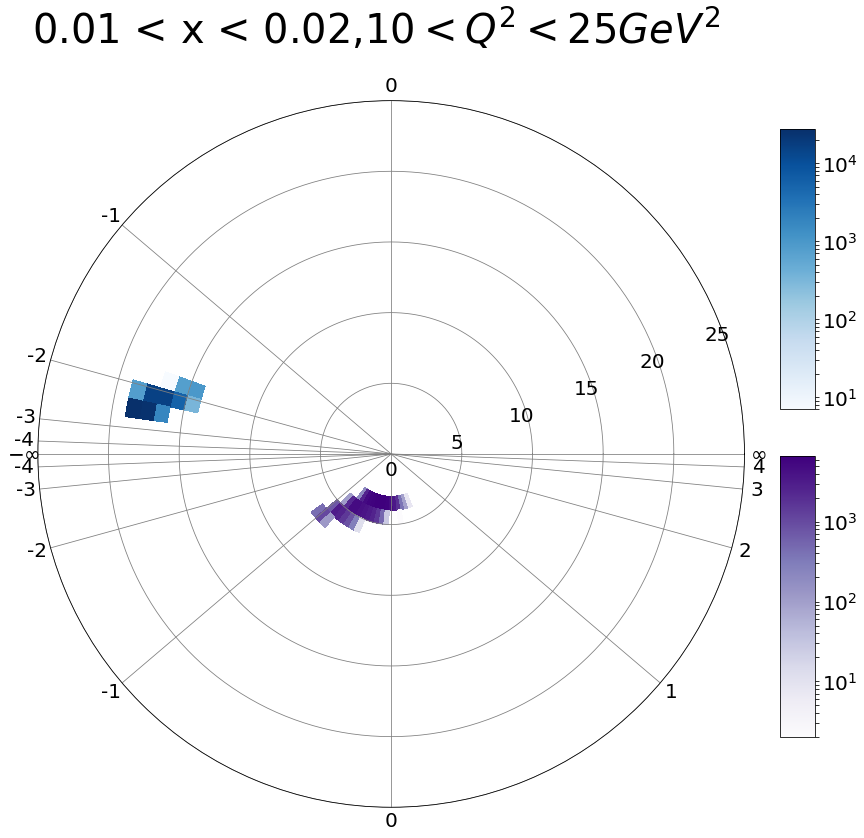

In [16]:
plot(1, 1, '10 < Q^2 < 25', '0.01 < x < 0.02', '10-25-01-02-q')

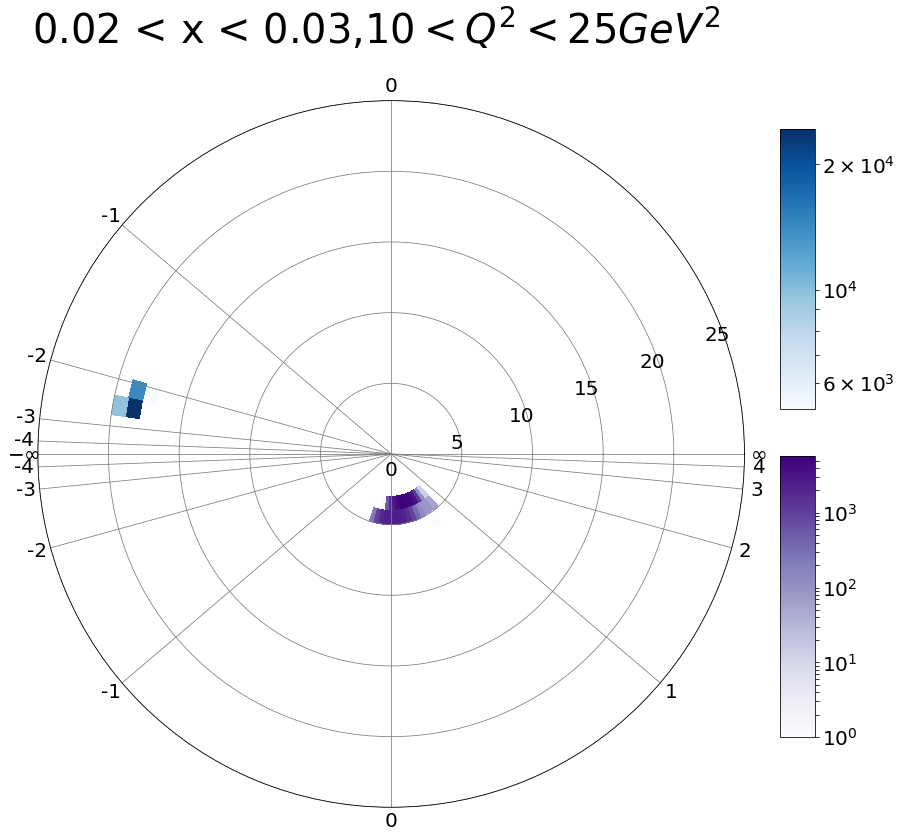

In [17]:
plot(1, 2, '10 < Q^2 < 25', '0.02 < x < 0.03', '10-25-02-03-q')

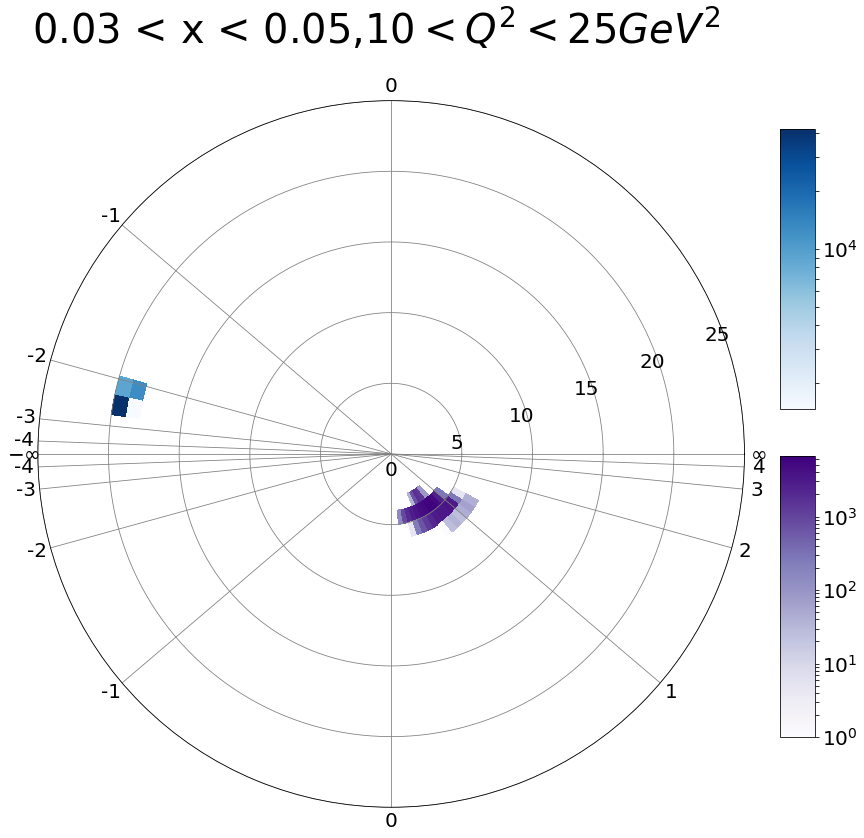

In [18]:
plot(1, 3, '10 < Q^2 < 25', '0.03 < x < 0.05', '10-25-03-05-q')

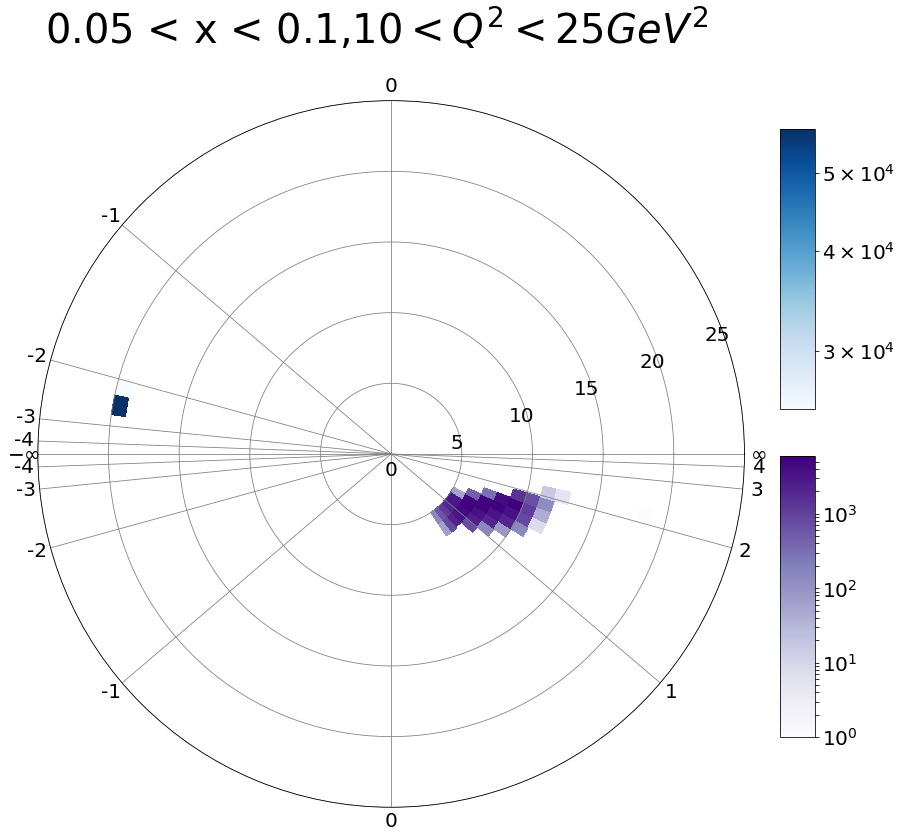

In [7]:
plot(1, 4, '10 < Q^2 < 25', '0.05 < x < 0.1', '10-25-05-1-q')

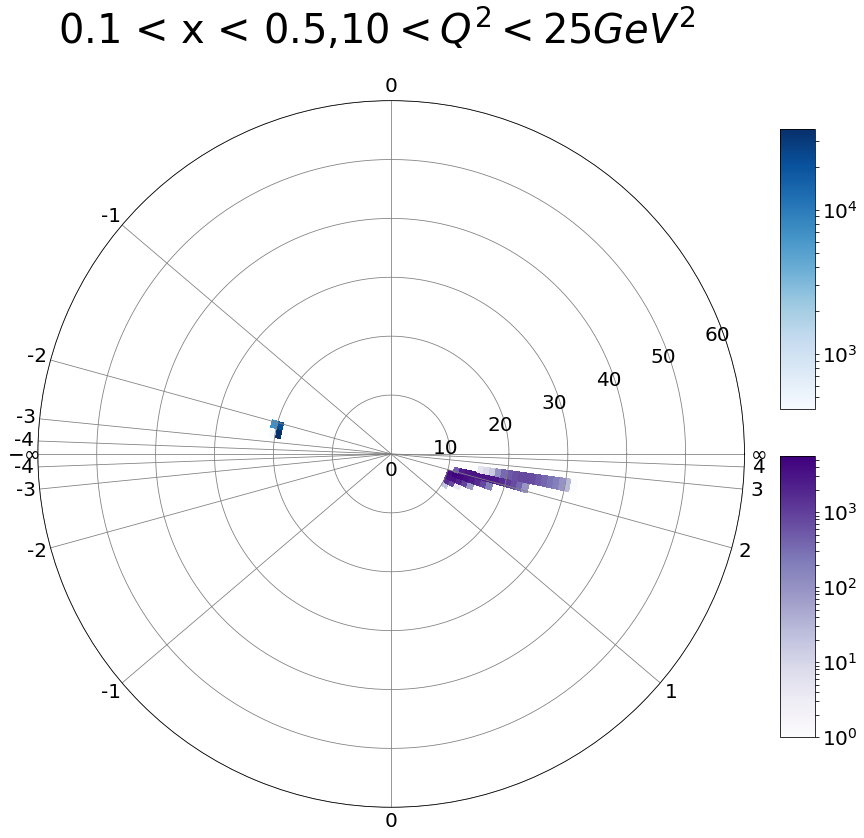

In [17]:
plot(1, 5, '10 < Q^2 < 25', '0.1 < x < 0.5', '10-25-1-5-q')

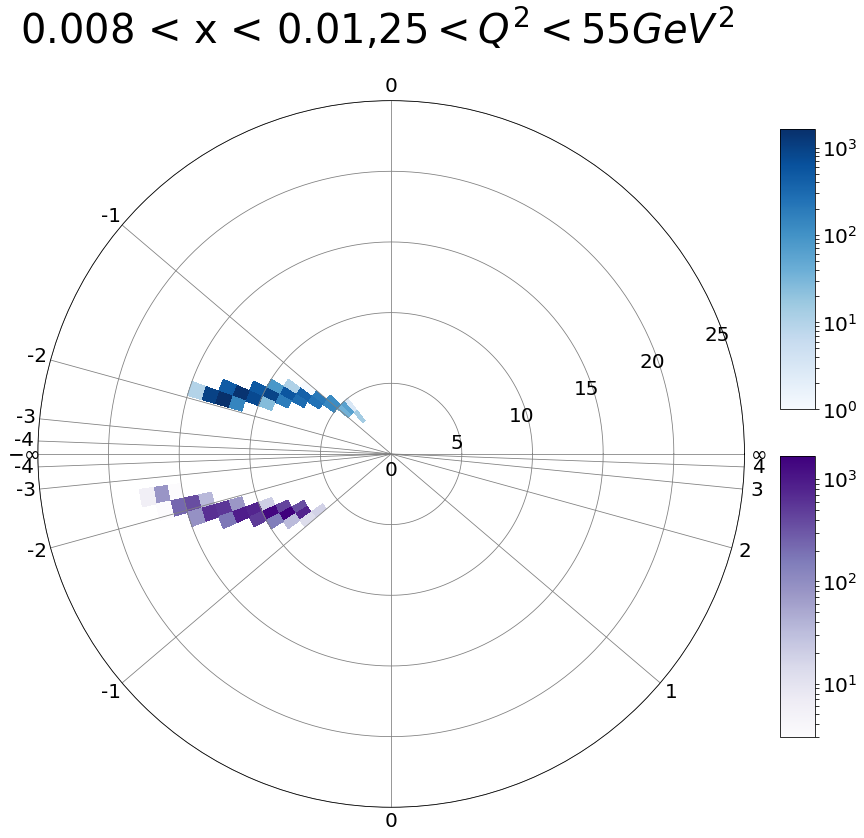

In [19]:
plot(2, 0, '25 < Q^2 < 55', '0.008 < x < 0.01', '25-55-008-01-q')

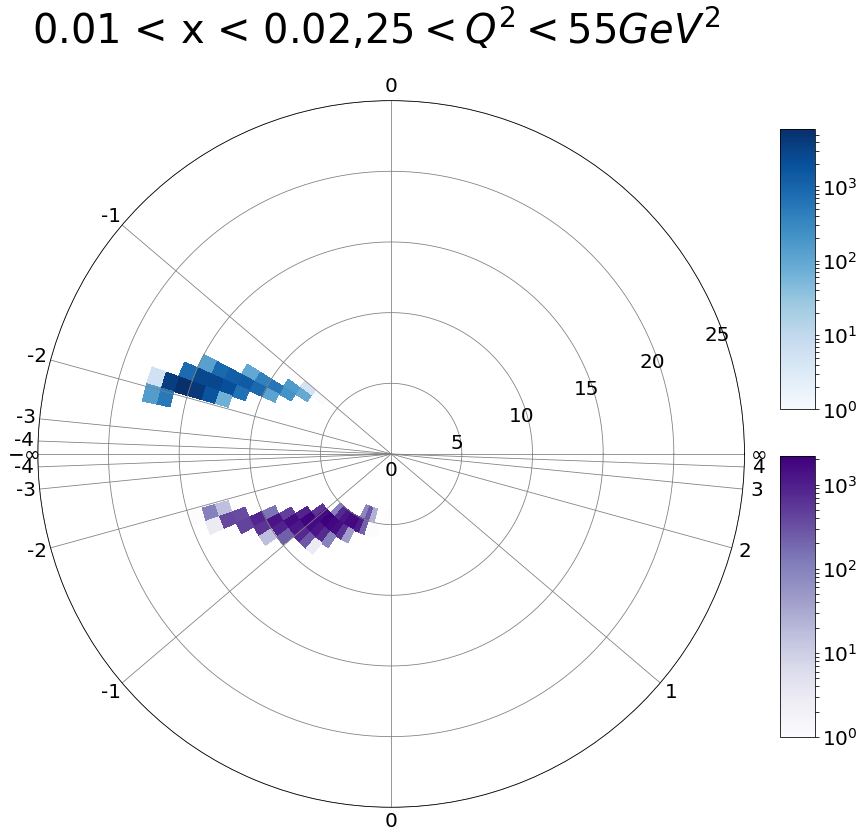

In [20]:
plot(2, 1, '25 < Q^2 < 55', '0.01 < x < 0.02', '25-55-01-02-q')

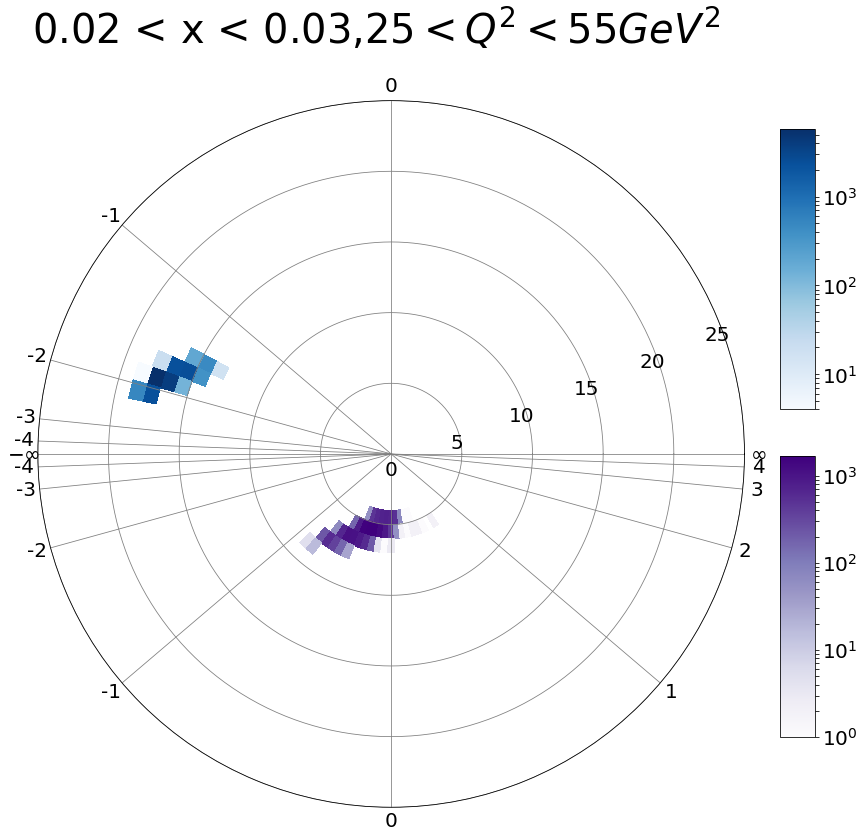

In [21]:
plot(2, 2, '25 < Q^2 < 55', '0.02 < x < 0.03', '25-55-02-03-q')

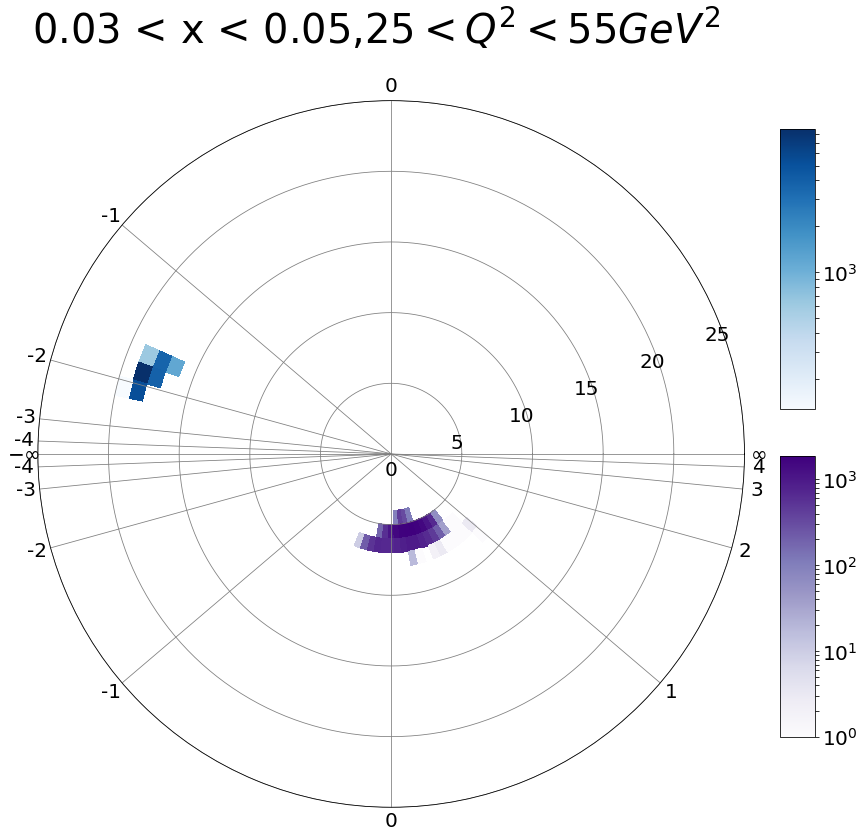

In [22]:
plot(2, 3, '25 < Q^2 < 55', '0.03 < x < 0.05', '25-55-03-05-q')

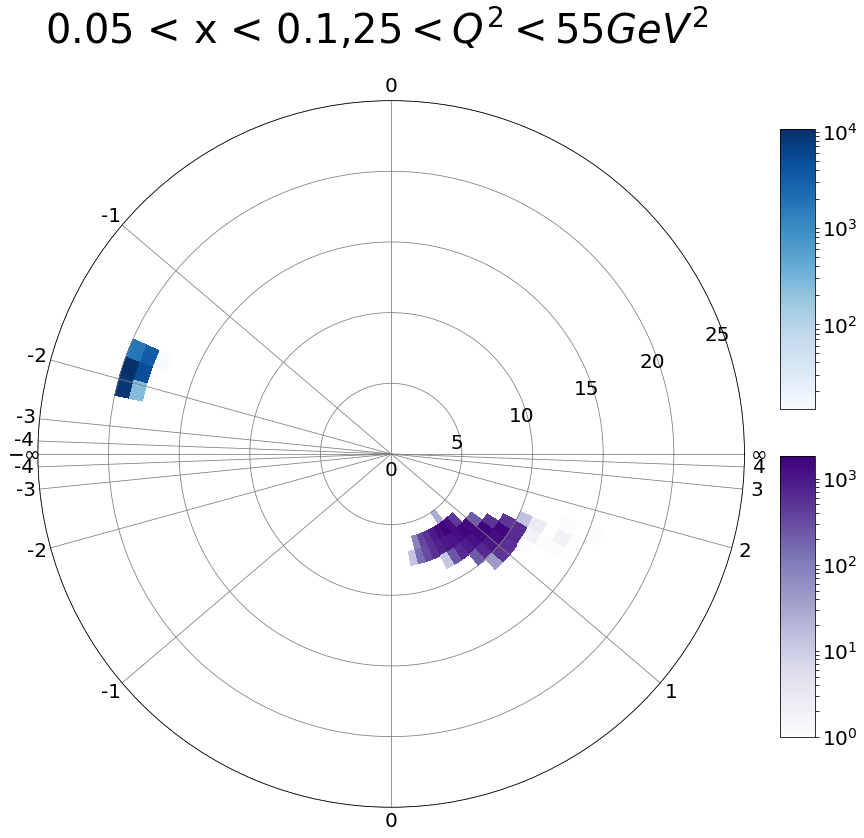

In [18]:
plot(2, 4, '25 < Q^2 < 55', '0.05 < x < 0.1', '25-55-05-1-q')

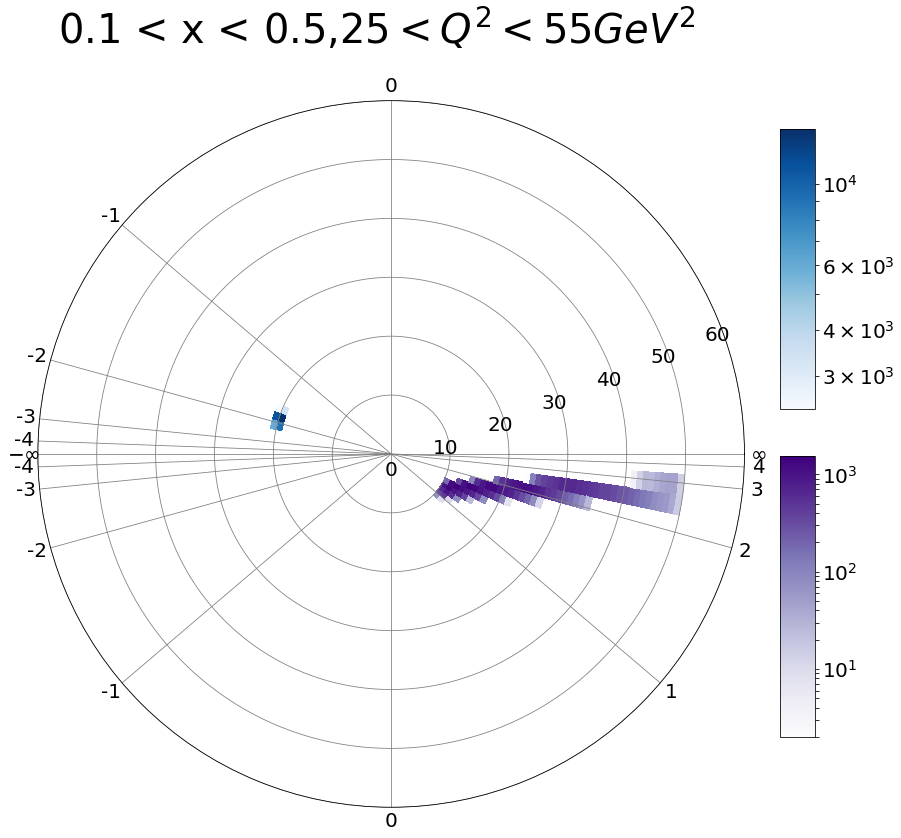

In [19]:
plot(2, 5, '25 < Q^2 < 55', '0.1 < x < 0.5', '25-55-1-5-q')

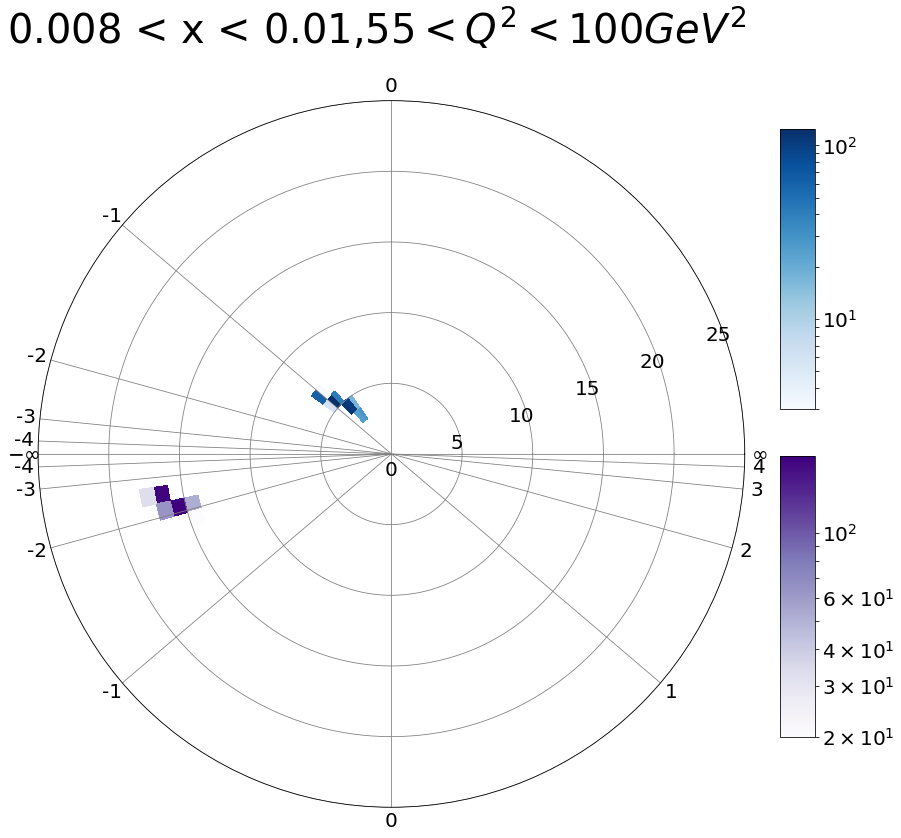

In [23]:
plot(3, 0, '55 < Q^2 < 100', '0.008 < x < 0.01', '55-100-008-01-q')

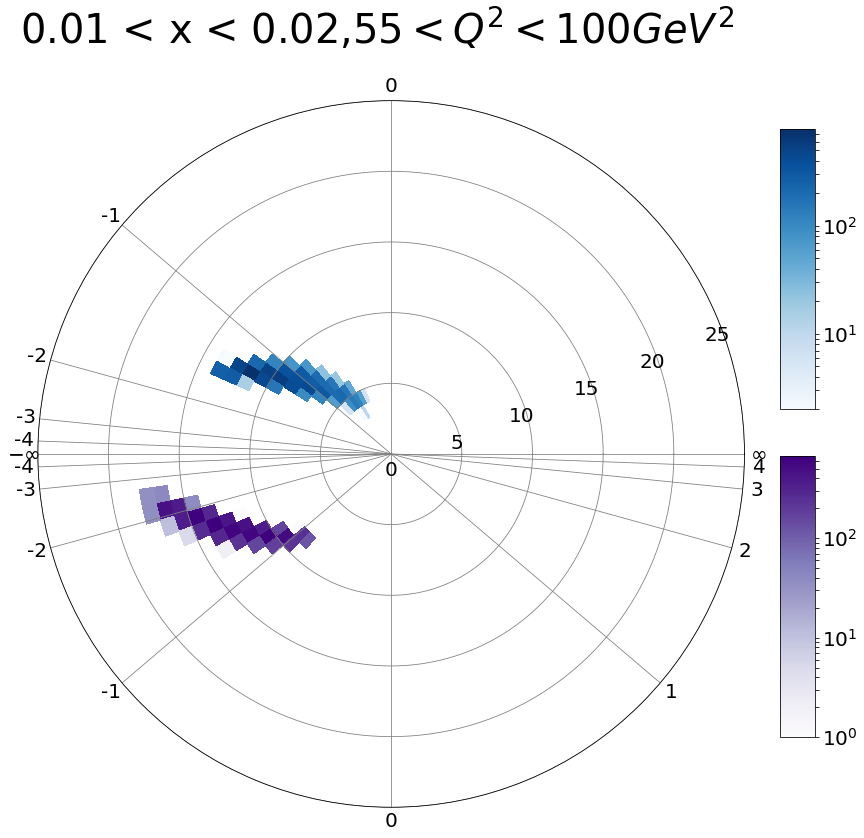

In [24]:
plot(3, 1, '55 < Q^2 < 100', '0.01 < x < 0.02', '55-100-01-02-q')

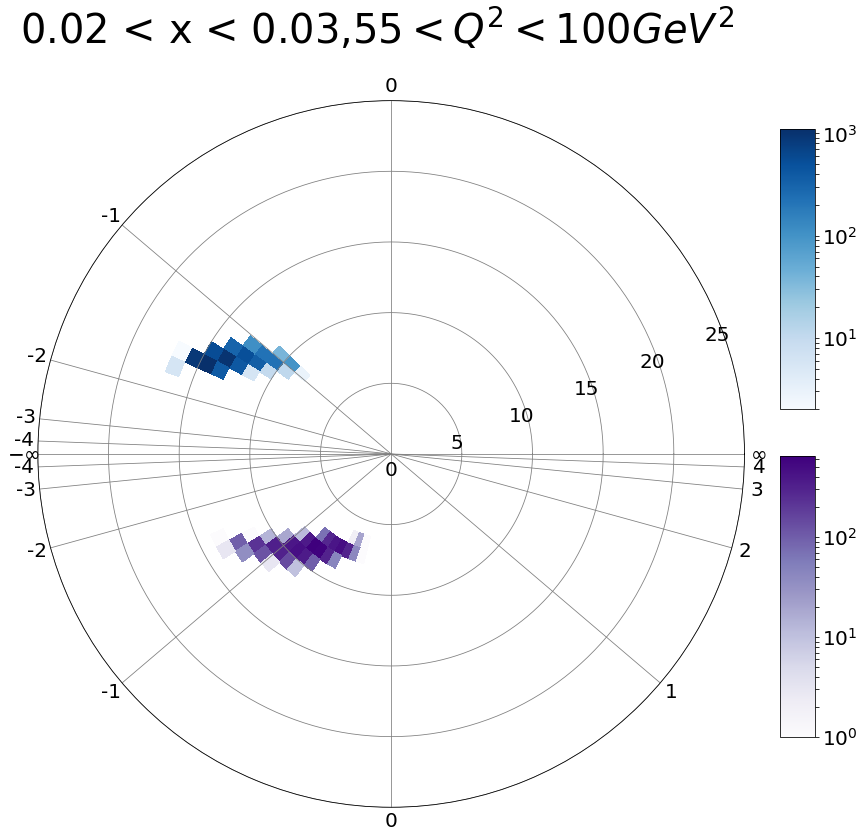

In [25]:
plot(3, 2, '55 < Q^2 < 100', '0.02 < x < 0.03', '55-100-02-03-q')

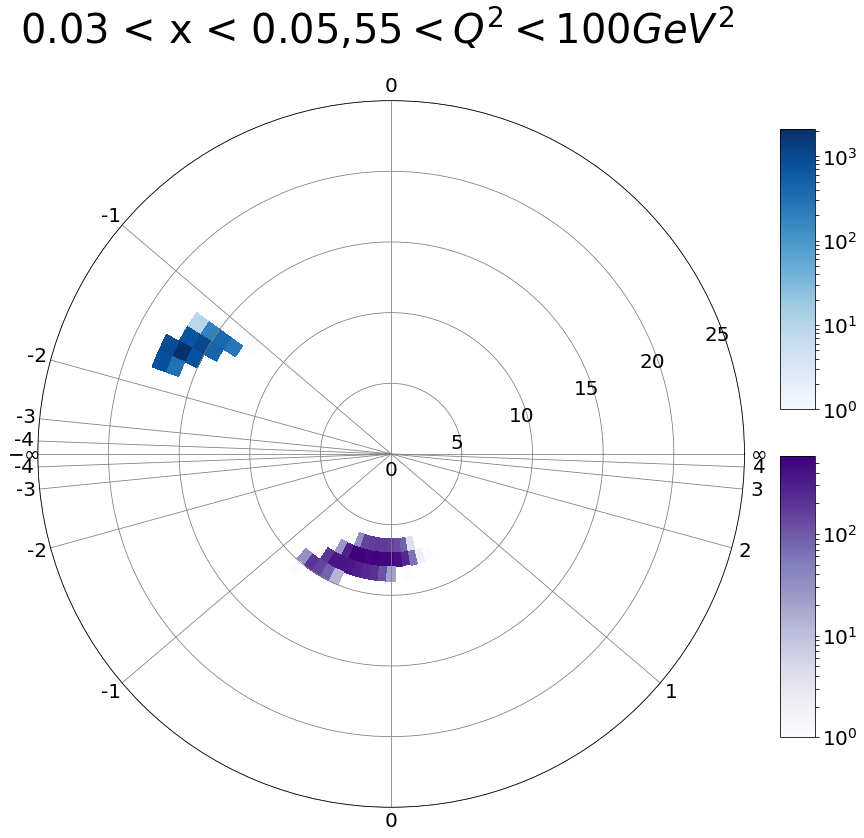

In [26]:
plot(3, 3, '55 < Q^2 < 100', '0.03 < x < 0.05', '55-100-03-05-q')

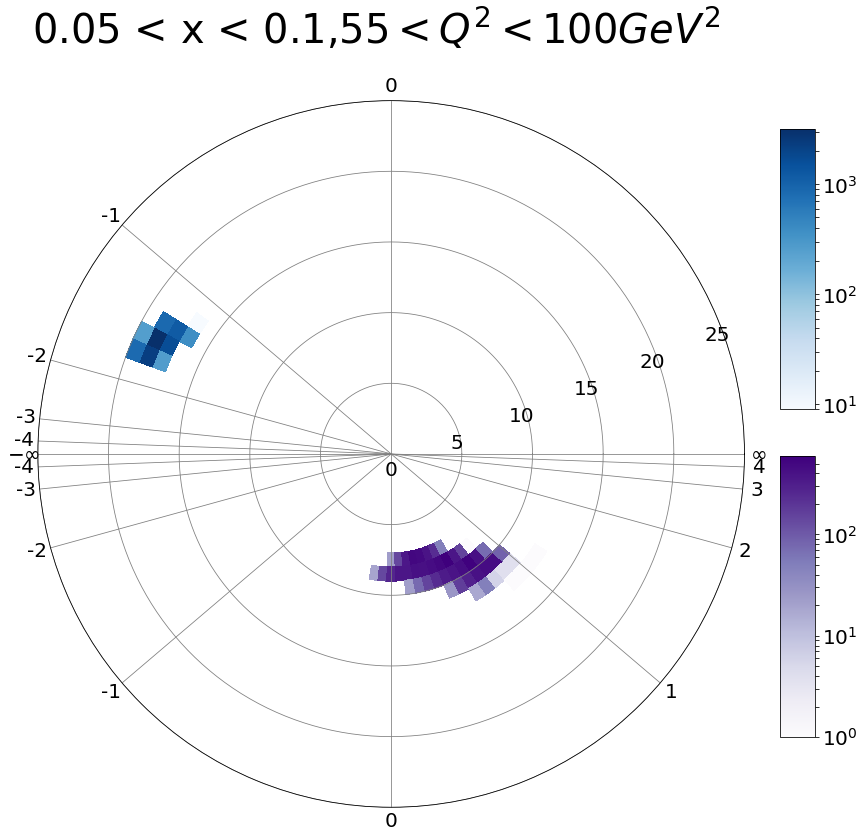

In [13]:
plot(3, 4, '55 < Q^2 < 100', '0.05 < x < 0.1', '55-100-05-1-q')

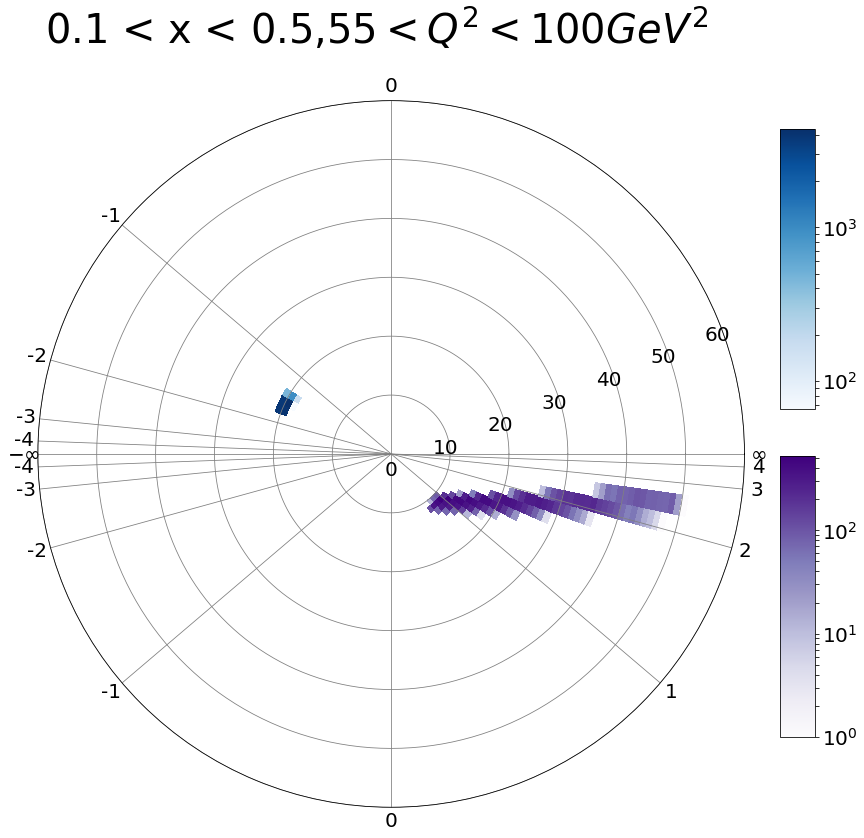

In [20]:
plot(3, 5, '55 < Q^2 < 100', '0.1 < x < 0.5', '55-100-1-5-q')

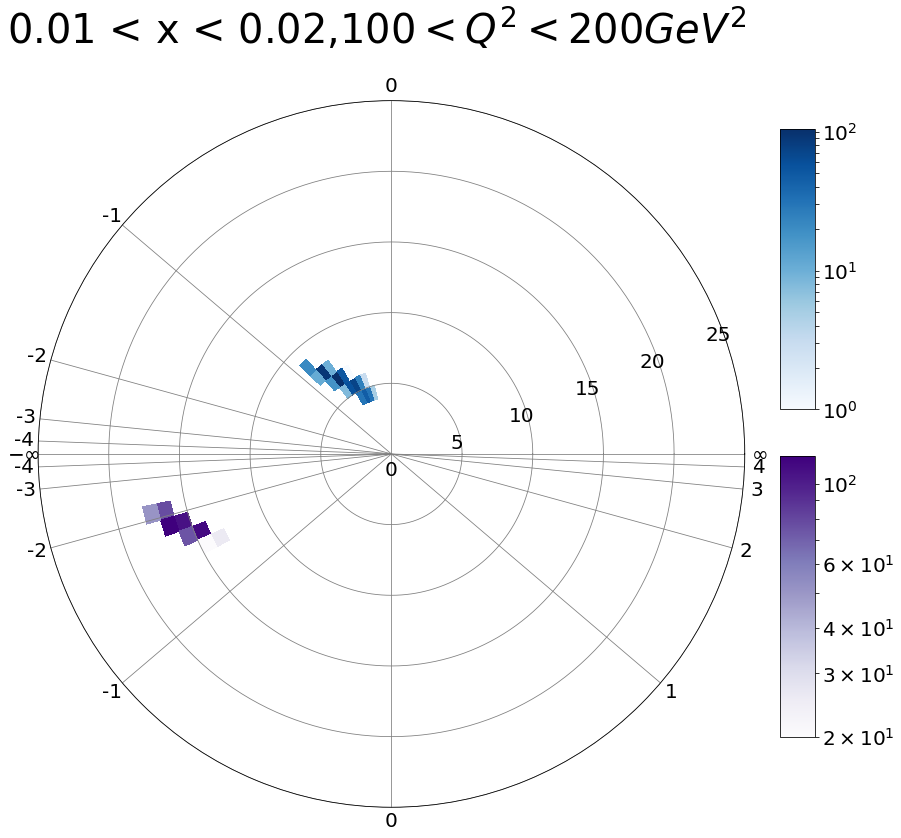

In [10]:
plot(4, 1, '100 < Q^2 < 200', '0.01 < x < 0.02', '100-200-01-02')

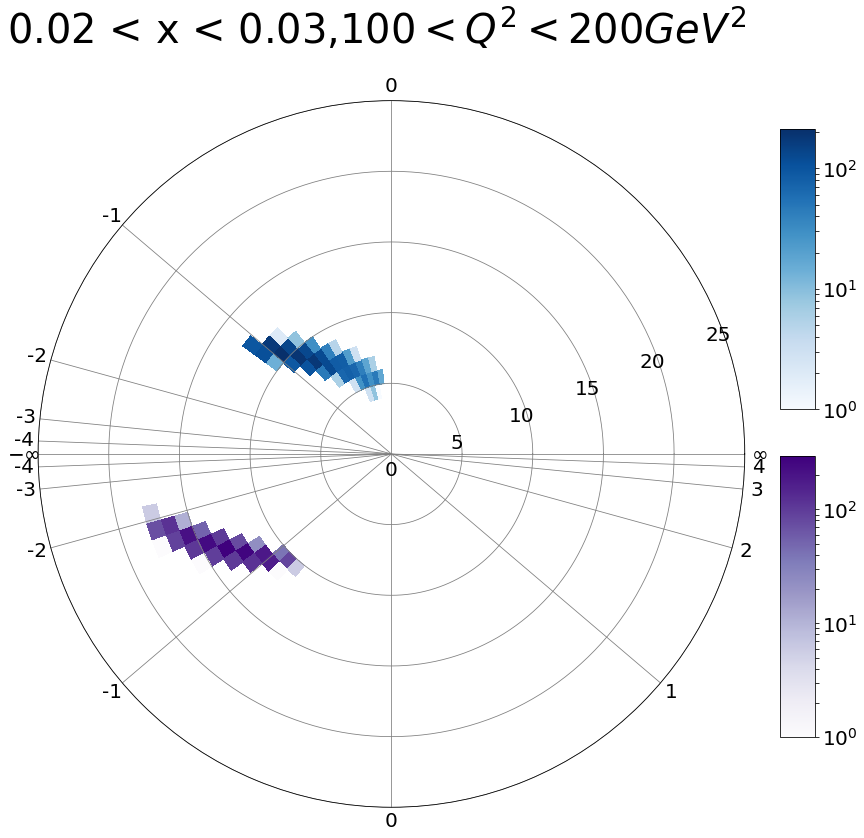

In [11]:
plot(4, 2, '100 < Q^2 < 200', '0.02 < x < 0.03', '100-200-02-03')

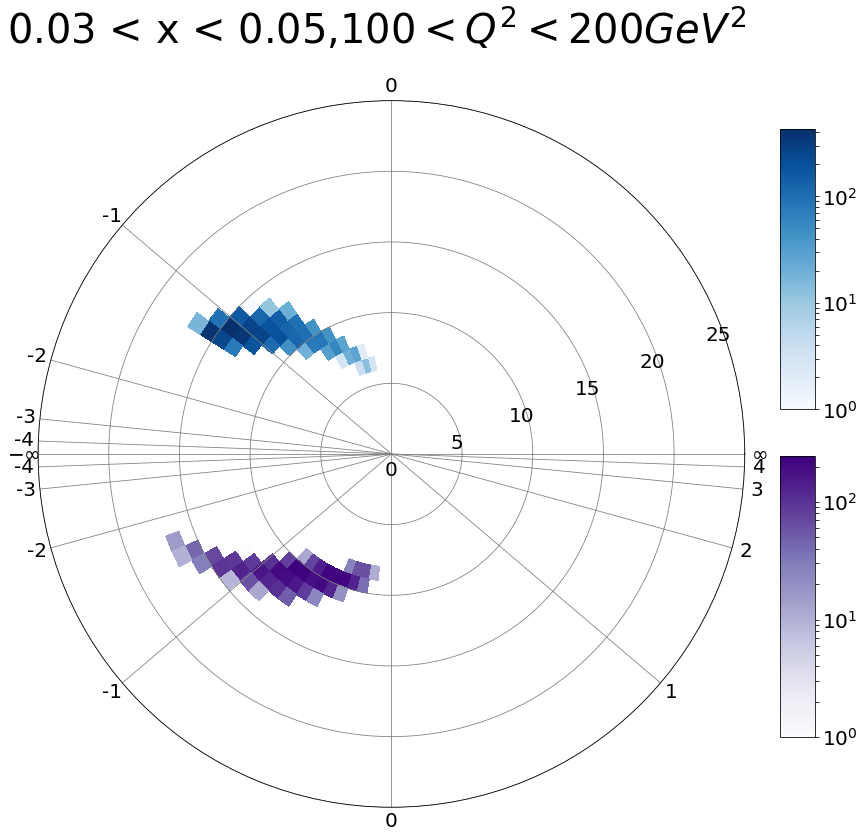

In [12]:
plot(4, 3, '100 < Q^2 < 200', '0.03 < x < 0.05', '100-200-03-05')

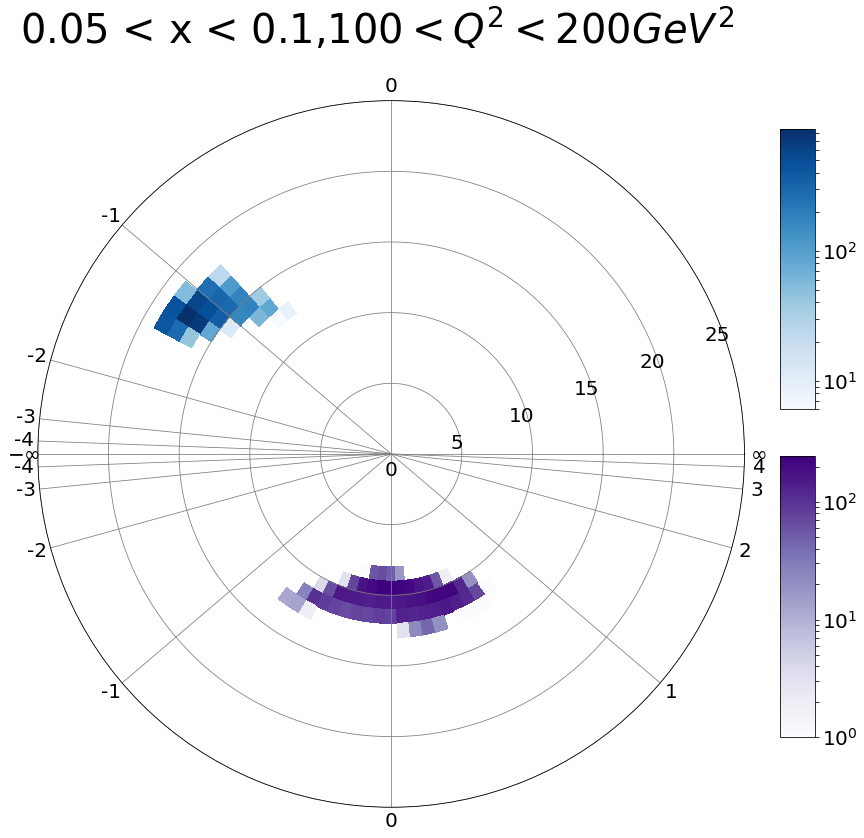

In [13]:
plot(4, 4, '100 < Q^2 < 200', '0.05 < x < 0.1', '100-200-05-1')

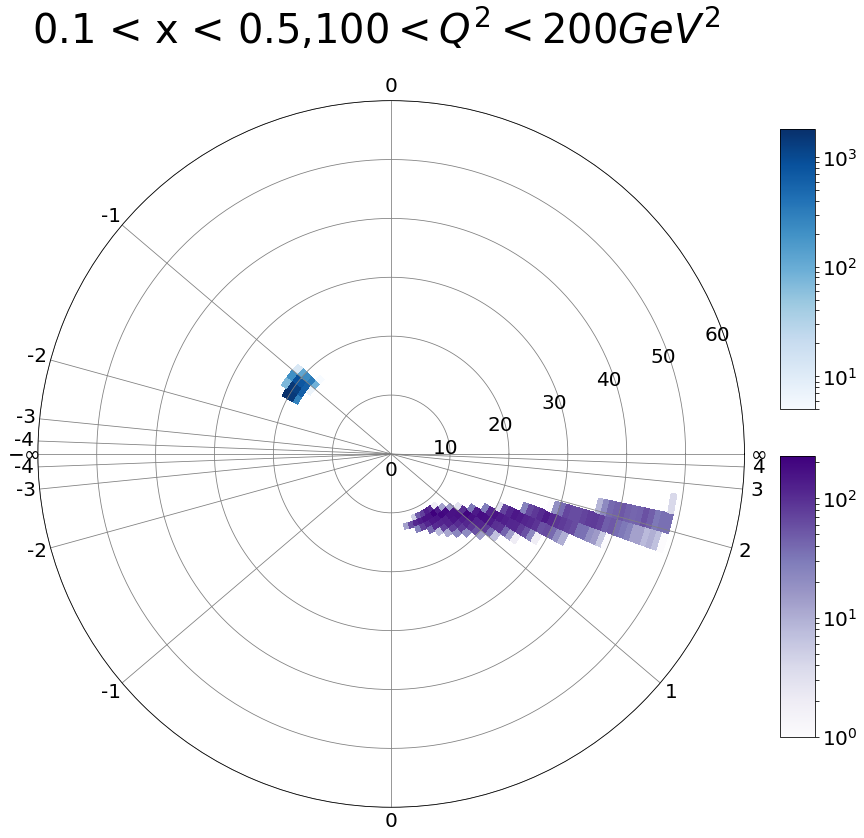

In [14]:
plot(4, 5, '100 < Q^2 < 200', '0.1 < x < 0.5', '100-200-1-5')

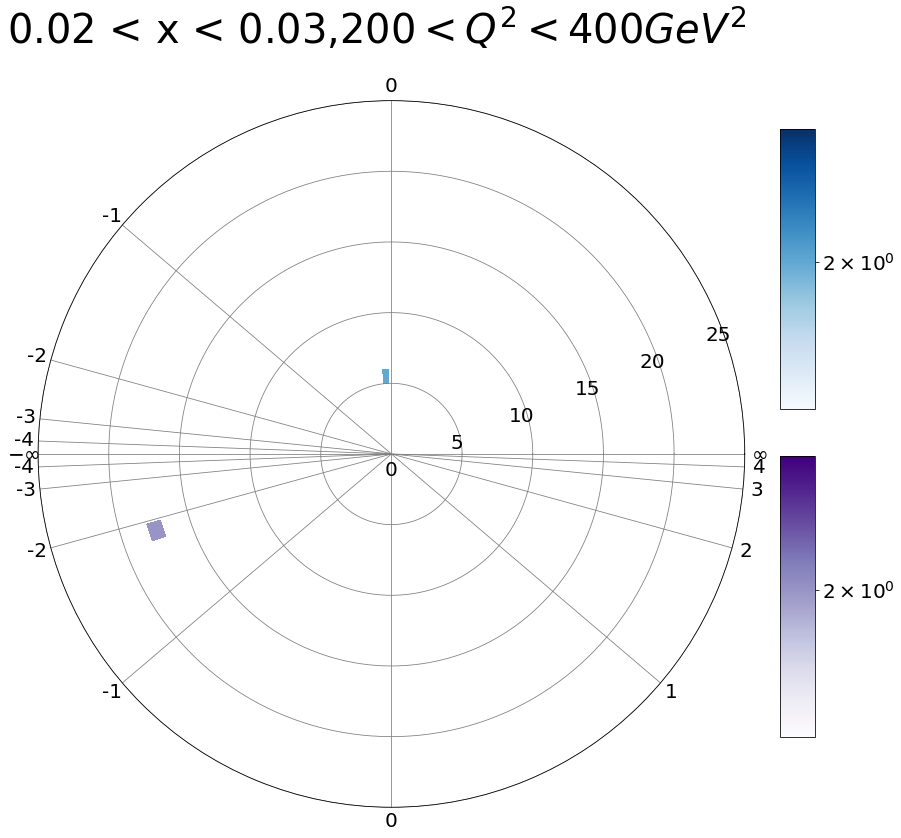

In [15]:
plot(5, 2, '200 < Q^2 < 400', '0.02 < x < 0.03', '200-400-02-03')

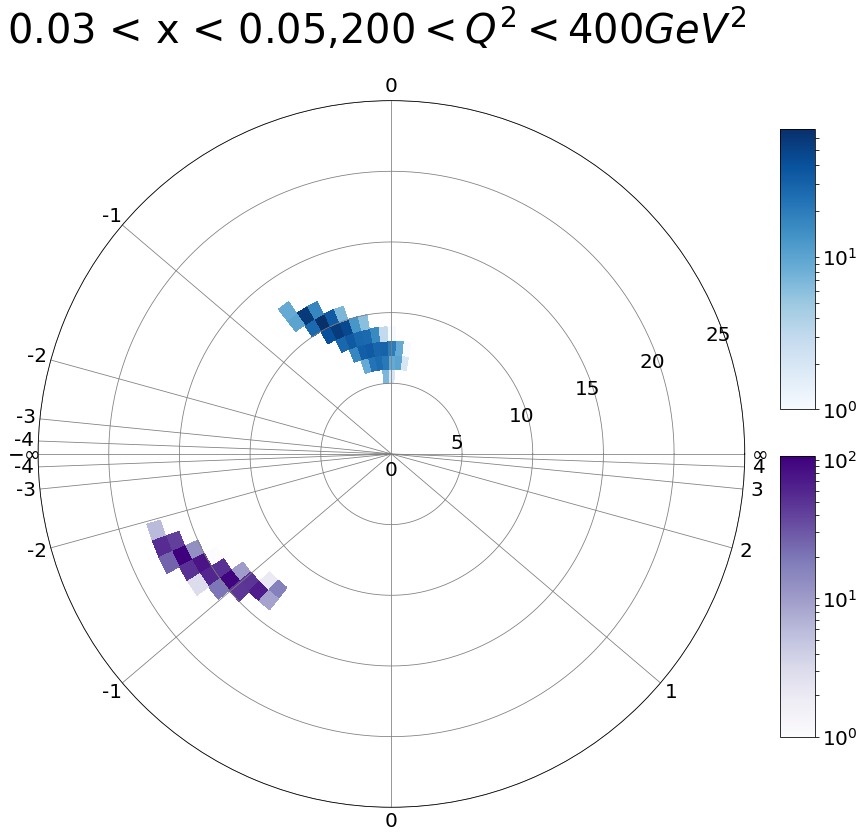

In [16]:
plot(5, 3, '200 < Q^2 < 400', '0.03 < x < 0.05', '200-400-03-05')

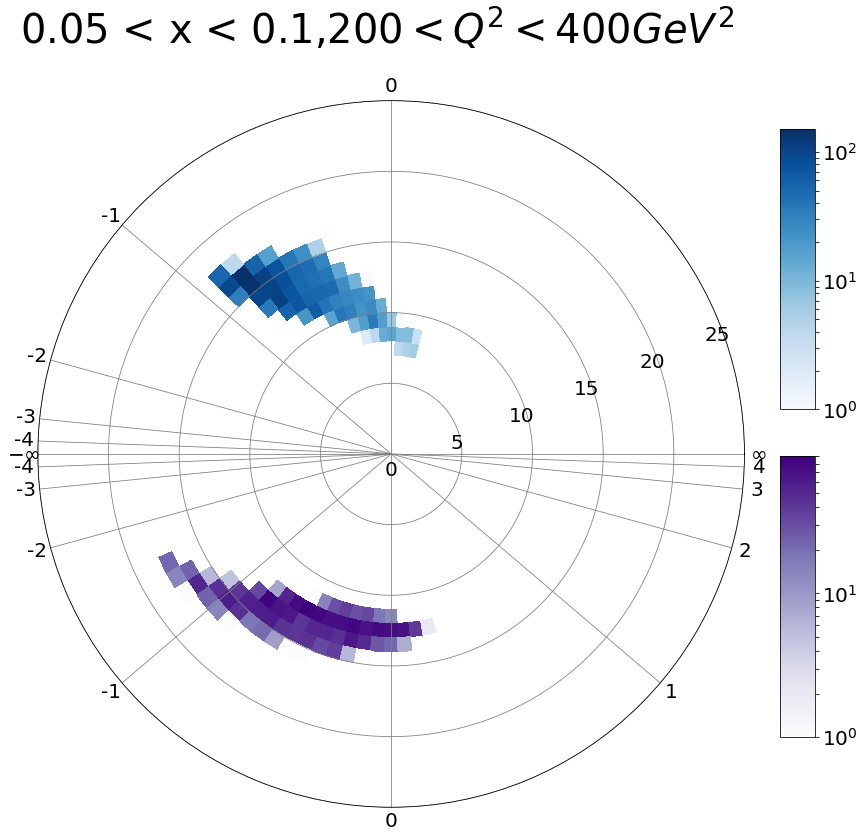

In [17]:
plot(5, 4, '200 < Q^2 < 400', '0.05 < x < 0.1', '200-400-05-1')

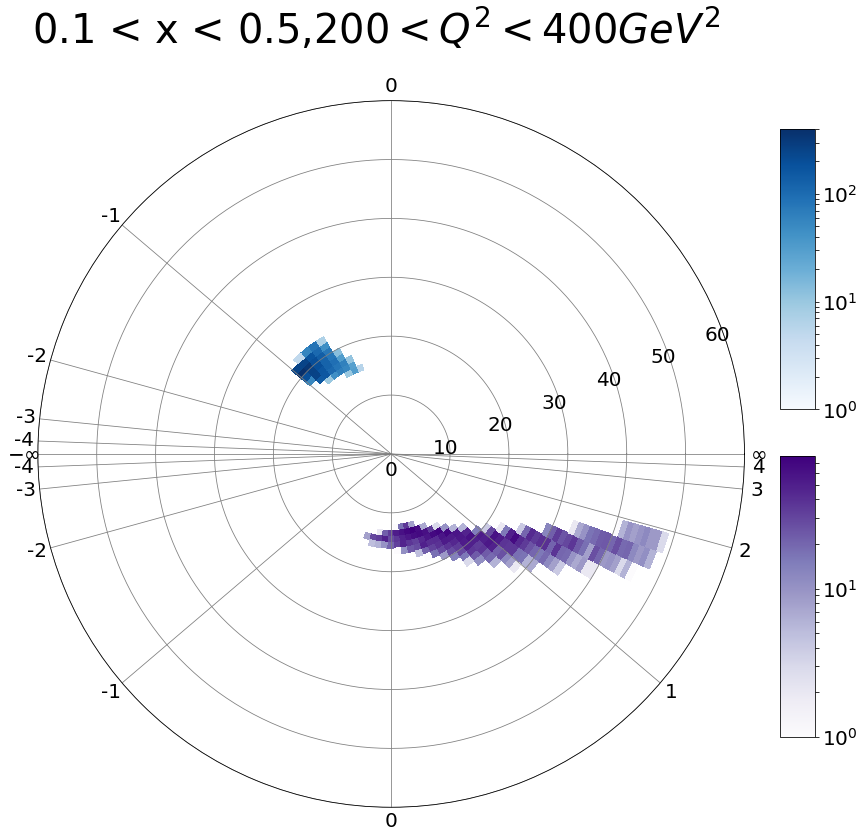

In [18]:
plot(5, 5, '200 < Q^2 < 400', '0.1 < x < 0.5', '200-400-1-5')

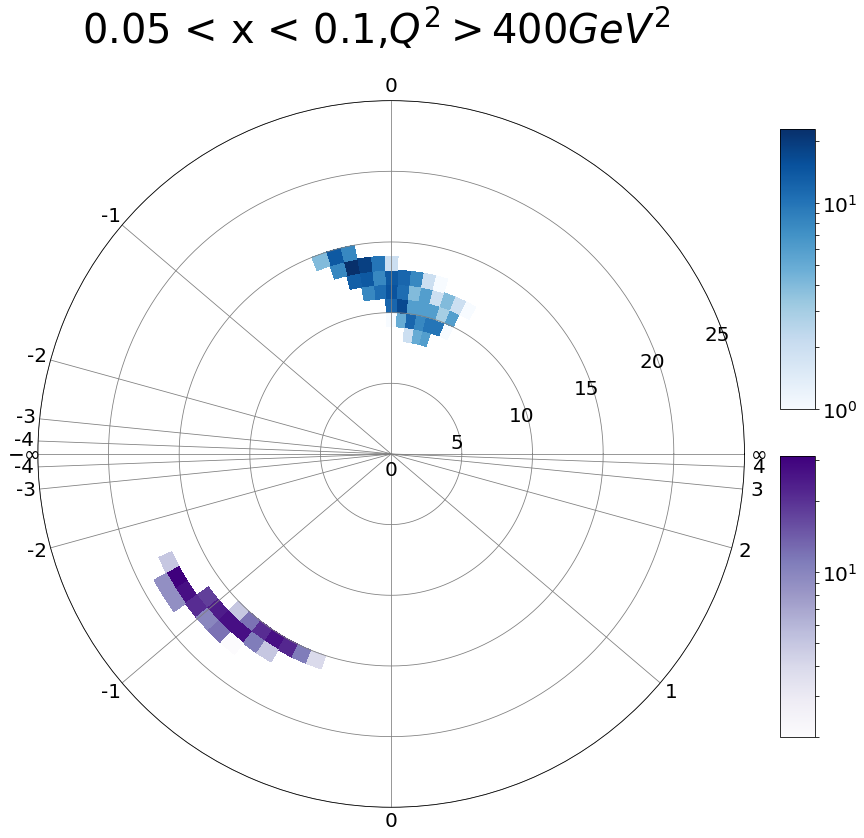

In [19]:
plot(6, 4, 'Q^2 > 400', '0.05 < x < 0.1', '400-05-1')

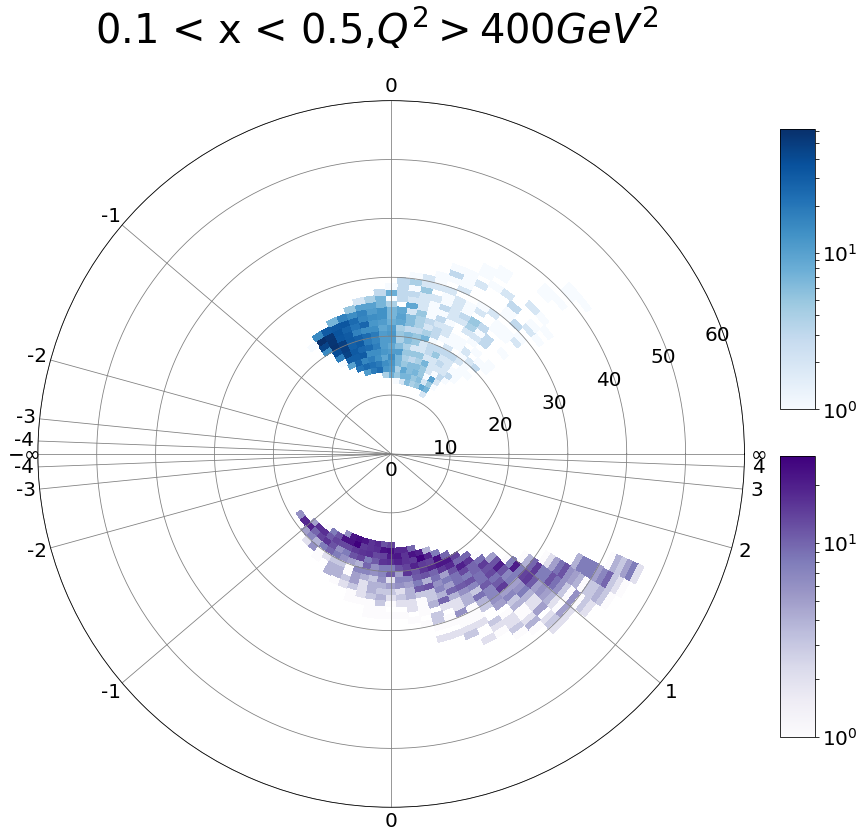

In [20]:
plot(6, 5, 'Q^2 > 400', '0.1 < x < 0.5', '400-1-5')